In [1]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np

Для начала реализуем одну из наивных сортировок -- сортировка вставками. В самой функции сортировок добавим фиксацию времени, затрачиваемого на сортировку.

In [2]:
def insert_sort(list_n):
    t1 = time.time()
    for i in range(1, len(list_n)):
        temp = list_n[i]
        j = i - 1
        while (j >= 0 and temp < list_n[j]):
            list_n[j + 1] = list_n[j]
            j = j - 1
        list_n[j + 1] = temp
    t2 = time.time()
    return t2 - t1

Построим график зависимости времени выполнения функции от размера выборки $n$.

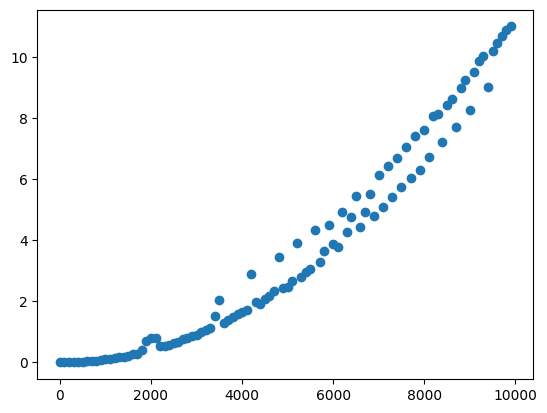

In [3]:
T = []
N = []
for n in range(1, 10000, 100):
    list_n = np.random.random(n)
    T.append(insert_sort(list_n))
    N.append(n)

plt.scatter(N, T)

Ожидаемая асимптотика -- $O(n^2)$. Построим ее на графике ниже.

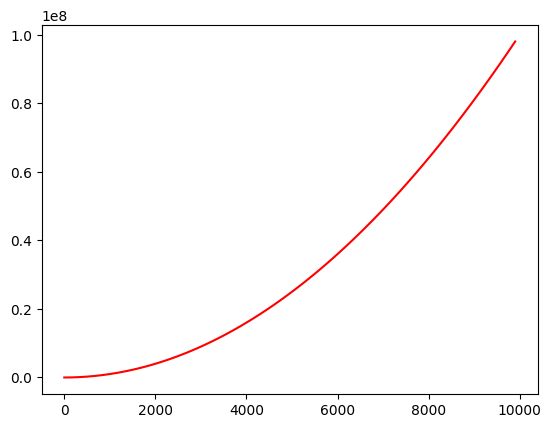

In [4]:
plt.plot(N, np.power(N, 2), color = 'red')


---
Реализуем быструю сортировку кучей.


In [9]:
def heapify(arr: list, n: int, i: int) -> None:
    largest = i
    l = 2 * i + 1  # левый лист
    r = 2 * i + 2  # правый лист

    if l < n and list_n[i] < list_n[l]:
        largest = l

    if r < n and list_n[largest] < list_n[r]:
        largest = r

    if largest != i:
        list_n[i], list_n[largest] = list_n[largest], list_n[i]
        heapify(list_n, n, largest)

def heap_sort(arr: list) -> None:

    t1 = time.time()

    n = len(list_n)
    for i in range(n // 2, -1, -1):
        heapify(arr, n, i)

    for i in range(n - 1, 0, -1):
        list_n[i], list_n[0] = list_n[0], list_n[i]
        heapify(arr, i, 0)

    t2 = time.time()

    return t2 - t1

Снова построим график зависимости $t(n)$. Теперь ожидаемая асимптотика -- $O(n \cdot logn)$

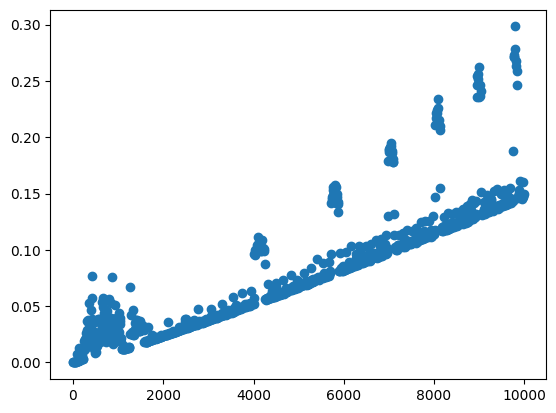

In [13]:
T = []
N = []
for n in range(1, 10000, 10):
    list_n = np.random.random(n)
    T.append(heap_sort(list_n))
    N.append(n)

plt.scatter(N, T)

Теперь график ожидаемой асимптотики:

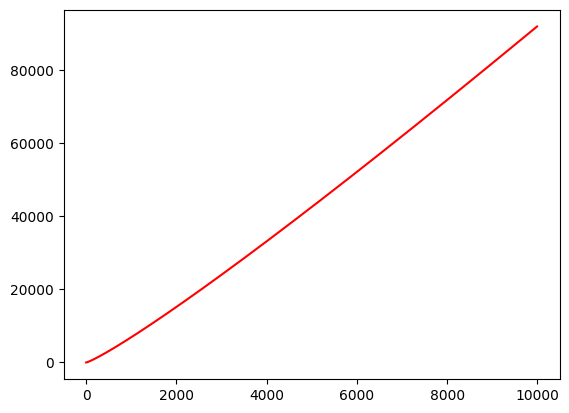

In [18]:
plt.plot(N, N * np.log(N), color = 'red')